### GraphPipeline getting started ###
This notebook is here to show a few things that can be done by the package.

It doesn't means that these are the things you should do on that particular dataset.



Let's load titanic dataset to test a few things

In [1]:
import warnings
warnings.filterwarnings('ignore') # to remove gensim warning

In [2]:
from aikit.datasets.datasets import load_dataset, DatasetEnum
Xtrain, y_train, _ ,_ , _ = load_dataset(DatasetEnum.titanic)

In [3]:
Xtrain.head(20)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,175.0,"Dorchester, MA"
1,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
2,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,NaN
3,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,NaN,NaN,NaN
4,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,8,NaN,NaN
5,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S,NaN,NaN,"Antwerp, Belgium / Stanton, OH"
6,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S,NaN,NaN,NaN
7,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,8,NaN,"Brooklyn, NY"
8,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S,6,NaN,"Huntington, WV"
9,1,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S,NaN,109.0,London


In [4]:
y_train[0:20]

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

For now let's ignore the Name and Ticket column which should probably be handled as text

In [5]:
import pandas as pd
from aikit.transformers import TruncatedSVDWrapper, NumImputer, CountVectorizerWrapper, NumericalEncoder
from aikit.pipeline import GraphPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

I wont be able to import category_encoders
Matplotlib won't work


In [6]:
non_text_cols = [c for c in Xtrain.columns if c not in ("ticket","name")] # everything that is not text
non_text_cols

['pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home_dest']

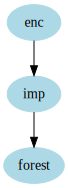

In [7]:
gpipeline = GraphPipeline(models = { "enc":NumericalEncoder(),
                                     "imp":NumImputer(),
                                     "forest":RandomForestClassifier(n_estimators=100)
                                   },
                          edges = [("enc","imp","forest")])

gpipeline.fit(Xtrain.loc[:,non_text_cols],y_train)
gpipeline.graphviz

##### Let's do a cross-validation

In [8]:
from aikit.cross_validation import cross_validation
cv_result = cross_validation(gpipeline, Xtrain.loc[:,non_text_cols], y_train,cv = 10,
                             scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



,test_roc_auc,test_accuracy,test_neg_log_loss,train_roc_auc,train_accuracy,train_neg_log_loss,fit_time,score_time,n_test_samples,fold_nb
0,0.997713,0.990476,-0.052931,0.999835,0.995758,-0.030197,0.168860,0.057120,105,0
1,0.967416,0.952381,-0.723573,0.999986,0.997879,-0.022999,0.112918,0.050812,105,1
2,0.985518,0.952381,-0.150190,0.999816,0.995758,-0.027503,0.115226,0.051023,105,2
3,1.000000,1.000000,-0.033902,0.999821,0.995758,-0.029219,0.115959,0.078289,105,3
4,0.995808,0.961905,-0.084414,0.999802,0.995758,-0.026391,0.178423,0.086631,105,4
5,0.993521,0.952381,-0.112725,0.999769,0.997879,-0.025432,0.109806,0.050660,105,5
6,1.000000,0.990476,-0.042530,0.999707,0.995758,-0.031124,0.176480,0.055208,105,6
7,0.995808,0.980952,-0.091637,0.999814,0.996819,-0.025740,0.120470,0.054042,105,7
8,0.993031,0.971154,-0.103502,0.999807,0.995763,-0.027354,0.124299,0.056380,104,8
9,0.999226,0.980769,-0.065747,0.999793,0.995763,-0.028550,0.114739,0.049358,104,9


This cross-validate the complete Pipeline. The difference with sklearn function is that :
* you can score more than one metric at a time
* you retrieve train and test score

In [9]:
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

test_roc_auc         0.992804
test_accuracy        0.973288
test_neg_log_loss   -0.146115
dtype: float64

We can do the same but selecting the columns directly in the pipeline :

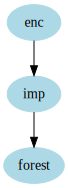

In [10]:
gpipeline2 = GraphPipeline(models = { "enc":NumericalEncoder(columns_to_use=non_text_cols),
                                      "imp":NumImputer(),
                                      "forest":RandomForestClassifier(n_estimators=100)
                                    },
                         edges = [("enc","imp","forest")])

gpipeline2.fit(Xtrain,y_train)
gpipeline2.graphviz

In [11]:
cv_result = cross_validation(gpipeline2,Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.992459
test_accuracy        0.972335
test_neg_log_loss   -0.147184
dtype: float64

Now let's see what we can do with the columns we excluded. We could craft features from them, but let's try to use them as text directly.

In [12]:
text_cols = ["ticket","name"]
vect = CountVectorizerWrapper(analyzer="word", columns_to_use=text_cols)
vect.fit(Xtrain,y_train)

CountVectorizerWrapper(analyzer='word', column_prefix='BAG',
                       columns_to_use=['ticket', 'name'],
                       desired_output_type='SparseArray',
                       keep_other_columns='drop', max_df=1.0, max_features=None,
                       min_df=1, ngram_range=1, regex_match=False, tfidf=False,
                       vocabulary=None)

In [13]:
features = vect.get_feature_names()
features[0:20] + ["..."] + features[-20:]

['ticket__BAG__10482',
 'ticket__BAG__110152',
 'ticket__BAG__110413',
 'ticket__BAG__110465',
 'ticket__BAG__110469',
 'ticket__BAG__110489',
 'ticket__BAG__110564',
 'ticket__BAG__110813',
 'ticket__BAG__111163',
 'ticket__BAG__111240',
 'ticket__BAG__111320',
 'ticket__BAG__111361',
 'ticket__BAG__111369',
 'ticket__BAG__111426',
 'ticket__BAG__111427',
 'ticket__BAG__112050',
 'ticket__BAG__112052',
 'ticket__BAG__112053',
 'ticket__BAG__112058',
 'ticket__BAG__11206',
 '...',
 'name__BAG__woolf',
 'name__BAG__woolner',
 'name__BAG__worth',
 'name__BAG__wright',
 'name__BAG__wyckoff',
 'name__BAG__yarred',
 'name__BAG__yasbeck',
 'name__BAG__ylio',
 'name__BAG__yoto',
 'name__BAG__young',
 'name__BAG__youseff',
 'name__BAG__yousif',
 'name__BAG__youssef',
 'name__BAG__yousseff',
 'name__BAG__yrois',
 'name__BAG__zabour',
 'name__BAG__zakarian',
 'name__BAG__zebley',
 'name__BAG__zenni',
 'name__BAG__zillah']

The encoder directly encodes the 2 features

In [14]:
xx_res = vect.transform(Xtrain)
xx_res

<1048x2440 sparse matrix of type '<class 'numpy.int64'>'
	with 5414 stored elements in COOrdinate format>

Again let's create a GraphPipeline to cross-validate

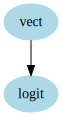

In [15]:
gpipeline3 = GraphPipeline(models = {"vect":CountVectorizerWrapper(analyzer="word",columns_to_use=text_cols),
                                     "logit":LogisticRegression(solver="liblinear")},edges=[("vect","logit")])
gpipeline3.fit(Xtrain,y_train)
gpipeline3.graphviz

In [16]:
cv_result = cross_validation(gpipeline3, Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.850918
test_accuracy        0.819679
test_neg_log_loss   -0.451681
dtype: float64

We can also try we "bag of char"

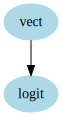

In [17]:
gpipeline4 = GraphPipeline(models = {
        "vect": CountVectorizerWrapper(analyzer="char",ngram_range=(1,4),columns_to_use=text_cols),
        "logit": LogisticRegression(solver="liblinear") }, edges=[("vect","logit")])
gpipeline4.fit(Xtrain,y_train)
gpipeline4.graphviz

In [18]:
cv_result = cross_validation(gpipeline4,Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.849773
test_accuracy        0.813956
test_neg_log_loss   -0.559255
dtype: float64

#####   Now let's use all the columns

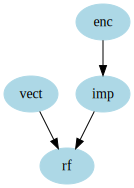

In [19]:
gpipeline5 = GraphPipeline(models = {"enc":NumericalEncoder(columns_to_use=non_text_cols),
                        "imp":NumImputer(),
                        "vect":CountVectorizerWrapper(analyzer="word",columns_to_use=text_cols),
                        "rf":RandomForestClassifier(n_estimators=100)
                       },
              edges = [("enc","imp","rf"),("vect","rf")])
gpipeline5.fit(Xtrain,y_train)
gpipeline5.graphviz

This model uses both set of columns:
* bag of word
* and categorical/numerical features

In [20]:
cv_result = cross_validation(gpipeline5,Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.992654
test_accuracy        0.967564
test_neg_log_loss   -0.199877
dtype: float64

<b>We can also use both Bag of Char and Bag of Word </b>

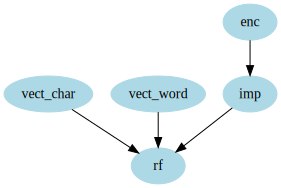

In [21]:
gpipeline6 = GraphPipeline(models = {"enc":NumericalEncoder(columns_to_use=non_text_cols),
                        "imp":NumImputer(),
                        "vect_char":CountVectorizerWrapper(analyzer="word",columns_to_use=text_cols),
                        "vect_word":CountVectorizerWrapper(analyzer="char",ngram_range=(1,4),columns_to_use=text_cols),
                        "rf":RandomForestClassifier(n_estimators=100)
                       },
              edges = [("enc","imp","rf"),("vect_char","rf"),("vect_word","rf")])
gpipeline6.fit(Xtrain,y_train)
gpipeline6.graphviz

In [22]:
cv_result = cross_validation(gpipeline6,Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.949324
test_accuracy        0.842573
test_neg_log_loss   -0.296316
dtype: float64

Maybe we can try <b>SVD</b> to limit dimension of bag of char/word features

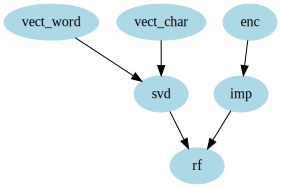

In [23]:
gpipeline7 = GraphPipeline(models = {"enc":NumericalEncoder(columns_to_use=non_text_cols),
                        "imp":NumImputer(),
                        "vect_word":CountVectorizerWrapper(analyzer="word",columns_to_use=text_cols),
                        "vect_char":CountVectorizerWrapper(analyzer="char",ngram_range=(1,4),columns_to_use=text_cols),
                        "svd":TruncatedSVDWrapper(n_components=100),
                        "rf":RandomForestClassifier(n_estimators=100)
                       },
              edges = [("enc","imp","rf"),("vect_word","svd","rf"),("vect_char","svd","rf")])
gpipeline7.fit(Xtrain,y_train)
gpipeline7.graphviz

In [24]:
cv_result = cross_validation(gpipeline7,Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.994093
test_accuracy        0.970430
test_neg_log_loss   -0.162642
dtype: float64

We can even add 'SVD' columns AND bag of word/char columns 

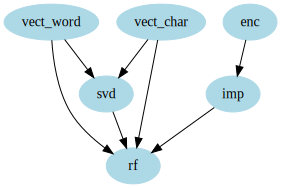

In [25]:
gpipeline8 = GraphPipeline(models = {"enc":NumericalEncoder(columns_to_use=non_text_cols),
                        "imp":NumImputer(),
                        "vect_word":CountVectorizerWrapper(analyzer="word",columns_to_use=text_cols),
                        "vect_char":CountVectorizerWrapper(analyzer="char",ngram_range=(1,4),columns_to_use=text_cols),
                        "svd":TruncatedSVDWrapper(n_components=100),
                        "rf":RandomForestClassifier(n_estimators=100)
                       },
            edges = [("enc","imp","rf"),("vect_word","svd","rf"),("vect_char","svd","rf"),("vect_word","rf"),("vect_char","rf")])
gpipeline8.fit(Xtrain,y_train)
gpipeline8.graphviz

In [26]:
cv_result = cross_validation(gpipeline8,Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.944385
test_accuracy        0.848306
test_neg_log_loss   -0.323621
dtype: float64

Instead of 'SVD' we can add a layer that filter columns... 

In [27]:
from aikit.transformers import FeaturesSelectorClassifier

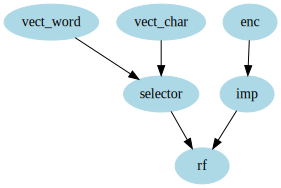

In [28]:
gpipeline9 = GraphPipeline(models = {"enc":NumericalEncoder(columns_to_use=non_text_cols),
                        "imp":NumImputer(),
                        "vect_word":CountVectorizerWrapper(analyzer="word",columns_to_use=text_cols),
                        "vect_char":CountVectorizerWrapper(analyzer="char",ngram_range=(1,4),columns_to_use=text_cols),
                        "selector":FeaturesSelectorClassifier(n_components=10),
                        "rf":RandomForestClassifier(n_estimators=100)
                       },
              edges = [("enc","imp","rf"),("vect_word","selector","rf"),("vect_char","selector","rf")])
gpipeline9.fit(Xtrain,y_train)
gpipeline9.graphviz

### Retrieve feature importance
Let's use that complicated example to show how to retrieve the feature importance

In [29]:
df_imp = pd.Series(gpipeline9.models["rf"].feature_importances_,
                  index = gpipeline9.get_input_features_at_node("rf"))
df_imp.sort_values(ascending=False,inplace=True)
df_imp

boat____null__             3.861984e-01
fare                       4.452563e-02
sex__female                4.280714e-02
name__BAG__mr              4.173047e-02
sex__male                  4.105027e-02
age                        3.133755e-02
name__BAG__s.              2.939194e-02
name__BAG__mr.             2.849791e-02
boat__15                   2.725100e-02
boat____default__          2.549449e-02
name__BAG__mr.             2.442661e-02
pclass                     2.059064e-02
name__BAG__ mr.            2.057098e-02
name__BAG__s.              1.979467e-02
boat__13                   1.895729e-02
sibsp                      1.865041e-02
name__BAG__r.              1.315256e-02
boat__7                    1.107319e-02
boat__C                    1.088121e-02
name__BAG__mrs.            1.071603e-02
home_dest____null__        1.071173e-02
cabin____default__         1.012639e-02
cabin____null__            9.442504e-03
name__BAG__, mr            9.413802e-03
parch                      9.046520e-03


In [30]:
cv_result = cross_validation(gpipeline9,Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.992407
test_accuracy        0.969478
test_neg_log_loss   -0.154415
dtype: float64

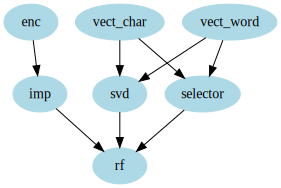

In [31]:
gpipeline10 = GraphPipeline(models = {"enc":NumericalEncoder(columns_to_use=non_text_cols),
                        "imp":NumImputer(),
                        "vect_word":CountVectorizerWrapper(analyzer="word",columns_to_use=text_cols),
                        "vect_char":CountVectorizerWrapper(analyzer="char",ngram_range=(1,4),columns_to_use=text_cols),
                        "svd":TruncatedSVDWrapper(n_components=10),
                        "selector":FeaturesSelectorClassifier(n_components=10),
                        "rf":RandomForestClassifier(n_estimators=100)
                       },
              edges = [("enc","imp","rf"),
                       ("vect_word","selector","rf"),
                       ("vect_char","selector","rf"),
                       ("vect_word","svd","rf"),
                       ("vect_char","svd","rf")])

gpipeline10.fit(Xtrain,y_train)
gpipeline10.graphviz

In this model here is what is done :
* categorical columns are encoded ('enc')
* missing values are filled  ('imp')
* bag of word and bag of char are created, for the two text features
* an SVD is done on those 
* a selector is called to select most important bag of word/char features
* everything is given to a RandomForest

In [32]:
cv_result = cross_validation(gpipeline10,Xtrain,y_train,cv = 10,scoring=["roc_auc","accuracy","neg_log_loss"])
cv_result.loc[:,("test_roc_auc","test_accuracy","test_neg_log_loss")].mean()

cv 0 started

cv 1 started

cv 2 started

cv 3 started

cv 4 started

cv 5 started

cv 6 started

cv 7 started

cv 8 started

cv 9 started



test_roc_auc         0.993550
test_accuracy        0.969487
test_neg_log_loss   -0.169416
dtype: float64

As we saw the GraphPipeline allow flexibility in the creation of models and several choices can be easily tested.

<b>Again, it is not the best possible choices for that database, the example are here to illustrate the capabilities.</b>

Better score could be obtained by adjusting hyper-parameters and/or models/transformers and creating some new features.
